# Compute Drawdowns

In [2]:
import pandas as pd

In [3]:
me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                     header = 0,
                     index_col = 0,
                     parse_dates = True,
                     na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets / 100

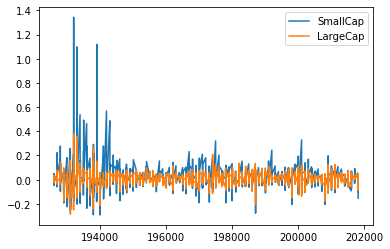

In [4]:
rets.plot.line();

In [5]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [6]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [7]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')

<AxesSubplot:>

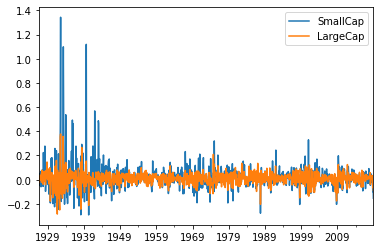

In [8]:
rets.plot.line()

In [9]:
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [10]:
rets.index = rets.index.to_period('M')

In [11]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [12]:
rets.loc['1975']

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [13]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [14]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown - which is the wealth value as a percentage of the previous peak

In [17]:
wealth_index = 1000 * (1 + rets['LargeCap']).cumprod()

In [18]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

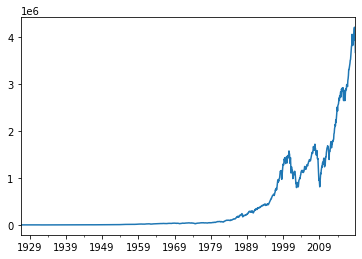

In [19]:
wealth_index.plot.line()

In [20]:
previous_peaks = wealth_index.cummax()

<AxesSubplot:>

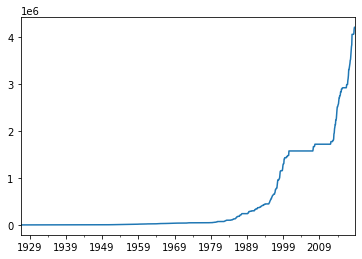

In [21]:
previous_peaks.plot.line()

In [22]:
drawdown = (wealth_index - previous_peaks) / previous_peaks

<AxesSubplot:>

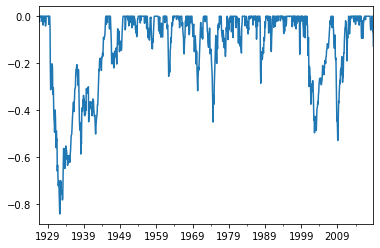

In [23]:
drawdown.plot()

In [24]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [25]:
drawdown.min()

-0.8400375277943123

In [26]:
drawdown['1975':].min()

-0.5280945042309304

In [27]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [28]:
drawdown.idxmin()

Period('1932-05', 'M')

In [29]:
def drawdown(return_series: pd.Series):
    """
    Takes a times series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peak
    percent drawdowns
    """
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

In [30]:
drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


<AxesSubplot:>

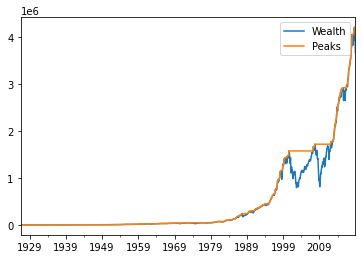

In [32]:
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].plot()

<AxesSubplot:>

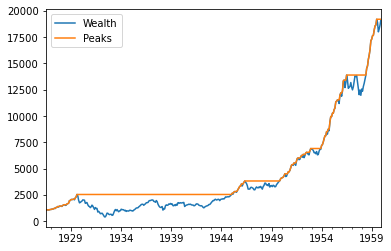

In [33]:
drawdown(rets[:'1959']['LargeCap'])[['Wealth', 'Peaks']].plot()

<AxesSubplot:>

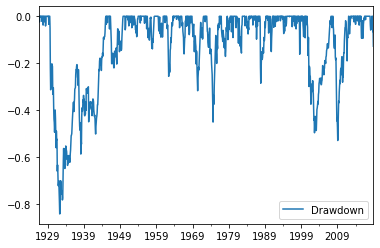

In [34]:
drawdown(rets['LargeCap'])[['Drawdown']].plot()

In [36]:
drawdown(rets['LargeCap'])[['Drawdown']].min()

Drawdown   -0.840038
dtype: float64

<AxesSubplot:>

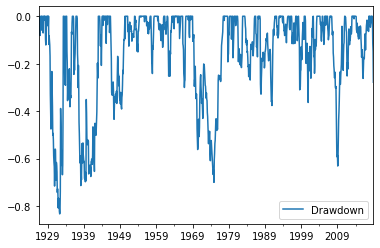

In [37]:
drawdown(rets['SmallCap'])[['Drawdown']].plot()

In [39]:
drawdown(rets['SmallCap'])[['Drawdown']].min()

Drawdown   -0.833001
dtype: float64

In [41]:
drawdown(rets['LargeCap'])[['Drawdown']].idxmin()

Drawdown    1932-05
dtype: period[M]

In [43]:
drawdown(rets['SmallCap'])[['Drawdown']].idxmin()

Drawdown    1932-05
dtype: period[M]

In [44]:
drawdown(rets['1949':]['LargeCap'])[['Drawdown']].min()

Drawdown   -0.528095
dtype: float64

In [45]:
drawdown(rets['1949':]['LargeCap'])[['Drawdown']].idxmin()

Drawdown    2009-02
dtype: period[M]

In [46]:
drawdown(rets['1949':]['SmallCap'])[['Drawdown']].min()

Drawdown   -0.70006
dtype: float64

In [47]:
drawdown(rets['1949':]['SmallCap'])[['Drawdown']].idxmin()

Drawdown    1974-12
dtype: period[M]